<a href="https://colab.research.google.com/github/yamazakikeisuke/python_for_journalism/blob/main/Python_for_journalism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python for journalism用コード**

> 　膨大なデータから新たな知見や視点を発見するデータジャーナリズムは、近年、メディア業界で注目されている新たな手法の一つとなった。国内のメディア企業がこのデータ報道に取り組んでおり、そういったプロジェクトへの着手を望む記者も多いと聞く。

>　そんな中で記者に前に立ちはだかるのが「プログラミング」という高い壁。PythonやRといった言語が分析には人気で、Rについては「R for Journalism」という英語の教材（ウェブサイト）があるが、Pythonについては見当たらず、「Pythonを勉強したいが記者向けの教材がない」、「プログラムのテキストを見ているだけでは続かない」という声をよく耳にする。

>　本稿では、Pythonを扱いデータを分析する方法を紹介したテキストのコード部分を抜粋した。自身のGroogle Colabにコピーしてコードを実行してみたり、自身がもつ他のデータの分析に応用するなどの活用してほしい。



**１章．システムのバージョン確認**

In [ ]:
import sys
print(sys.version)

3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]


**２章．ファイルを読み込む**

In [ ]:
#テスト用のファイルをダウンロード
!wget  "https://drive.google.com/uc?export=download&id=1F-g17E2OfPweROelRgbCuNuuwNOB3GvT" -O police_data_201803.csv

In [ ]:
#ファイルを読み込んでみる
import pandas as pd
df = pd.read_csv('police_data_201803.csv')  

In [ ]:
#読み込んだファイルの中身を表示して確認
df

In [ ]:
#テスト用のエクセルファイルをダウンロード
!wget  "https://drive.google.com/uc?export=download&id=1UciHm_BXyctWFNqBDnQ8WGfhTdY6w_lm" -O police_data_201803.xlsx

In [ ]:
import pandas as pd
df_excel = pd.read_excel("police_data_201803.xlsx", sheet_name="Sheet1")

In [ ]:
df_excel

**３章．データを扱う**

**３－１．数値データを扱う**

In [ ]:
!wget  "https://drive.google.com/uc?export=download&id=1BEAIDHEgucF4aHAqTeWL0oXy9sWfNuaR" -O channels_report.csv

In [ ]:
import pandas as pd
df = pd.read_csv('channels_report.csv')

**① 何行、何列のデータか確認する**

In [ ]:
#列数，行数の順で表示される
df.shape

**② 登録者数（subscriberCount）が多い順に並び替える**

In [ ]:
df.sort_values('subscriberCount', ascending=False)

**③ 登録者数の平均、中央値を算出してみる**

In [ ]:
#平均を求める
df["subscriberCount"].mean()

3188.2761904761905

In [ ]:
#中央値を求める
df["subscriberCount"].median()

117.0

**④ 2021年とそれ以外の年に開設されたチャンネルの登録者数の平均を算出してみる**

In [ ]:
#２１年のデータに絞る
df_2021 = df[df["year"] == 2021]
#絞ったデータで平均を求める
df_2021["subscriberCount"].mean()

4626.13698630137

In [ ]:
#２１年以外のデータに絞る
df_not_2021 = df[df["year"] != 2021]
#絞ったデータで平均を求める
df_not_2021["subscriberCount"].mean()

2754.5413223140495

**⑤ 政党ごとのチャンネル数を表示**

In [ ]:
df["party"].value_counts()

**⑥ 政党ごと(自民、立憲)の登録者数のランキング、平均、合計を表示**

In [ ]:
#自民党・候補者のチャンネル登録者数ランキング
df[df["party"] == "自民"].sort_values('subscriberCount', ascending=False)

In [ ]:
#自民党・候補者のチャンネル登録者数の平均
df[df["party"] == "自民"]["subscriberCount"].mean()

In [ ]:
#自民党・候補者のチャンネル登録者数の合計
df[df["party"] == "自民"]["subscriberCount"].sum()

In [ ]:
#立憲・候補者のチャンネル登録者数ランキング
df[df["party"] == "立憲"].sort_values('subscriberCount', ascending=False)

In [ ]:
#立憲・候補者のチャンネル登録者数の平均
df[df["party"] == "立憲"]["subscriberCount"].mean()

In [ ]:
#立憲・候補者のチャンネル登録者数の合計
df[df["party"] == "立憲"]["subscriberCount"].sum()

**３－２．テキストデータを扱う**

In [ ]:
!wget  "https://drive.google.com/uc?export=download&id=1F-g17E2OfPweROelRgbCuNuuwNOB3GvT" -O police_data_201803.csv

In [9]:
import pandas as pd
df = pd.read_csv('police_data_201803.csv')

**① タイトルに「詐欺」と含まれるデータを抽出する**

In [ ]:
#タイトルに「詐欺」が絞まれるメールに絞る
df_sagi = df[df['配信表題'].str.contains("詐欺")]
#表示
df_sagi

**② 品詞ごとに単語をカウントする**

**②-1 テキスト分析用ライブラリー「GiNZA」のインストール**

In [ ]:
#分析用のライブラリーをインストールする
#!pip install sudachipy sudachidict_core
!pip install -U ginza https://github.com/megagonlabs/ginza/releases/download/latest/ja_ginza_electra-latest-with-model.tar.gz

※念のため、上部メニューの「ランタイム」＞「ランタイムを再起動」を実行

**②-2 テキストを分かち書きしてみる**

In [ ]:
import spacy
nlp = spacy.load('ja_ginza_electra')
#文章を分かち書きするために解析
doc = nlp('データジャーナリズムは、大規模データを解析し新たな解釈を作り出す調査取材の手法です。')

#分析結果を表示
for sent in doc.sents:
    for token in sent:
        #token.orth_：元の単語, token.lemma_：基本形, token.pos_：品詞（英語）, token.tag_：品詞（日本語）
        print(token.orth_, token.lemma_, token.pos_, token.tag_)
    print('EOS')

**②-3 形容詞を数えあげる**

In [11]:
import spacy

#テキストを分かち書きして、品詞ごとに分類する関数
def TextToWakati_ginza(text, nlp):
   Arr_ADJ = []
   Arr_VERB = []
   Arr_NOUN = []
   Arr_ADV = []
   Arr_PROPN = []
   try:
      doc = nlp(text)
      # 品詞ごとに基本形を抽出する
      for sent in doc.sents:
         #形容詞（ADJ）、動詞（VERB）、名詞（NOUN）、副詞（ADV）、固有名詞（PROPN）を対象に設定
         for token in sent:
            if token.pos_ == "ADJ":
               Arr_ADJ.append(token.lemma_)
            elif token.pos_ == "VERB":
               Arr_VERB.append(token.lemma_)
            elif token.pos_ == "NOUN":
               Arr_NOUN.append(token.lemma_)
            elif token.pos_ == "ADV":
               Arr_ADV.append(token.lemma_)
            elif token.pos_ == "PROPN":
               Arr_PROPN.append(token.lemma_)
   #エラーした場合のスキップ処理
   except:
      print("==エラー==")
      print(text)
   return Arr_ADJ, Arr_VERB, Arr_NOUN, Arr_ADV, Arr_PROPN

#解析の準備
nlp = spacy.load('ja_ginza_electra')
Arr_ADJ_all = []
Arr_VERB_all = []
Arr_NOUN_all = []
Arr_ADV_all = []
Arr_PROPN_all = []

#データの読み込み→解析
for t in df_sagi["配信本文"]:
  Arr_ADJ, Arr_VERB, Arr_NOUN, Arr_ADV, Arr_PROPN = TextToWakati_ginza(t, nlp)
  #出力結果を追加していく
  Arr_ADJ_all = Arr_ADJ_all + Arr_ADJ
  Arr_VERB_all = Arr_VERB_all + Arr_VERB
  Arr_NOUN_all = Arr_NOUN_all + Arr_NOUN
  Arr_ADV_all = Arr_ADV_all + Arr_ADV
  Arr_PROPN_all = Arr_PROPN_all + Arr_PROPN

In [ ]:
#多く含まれる形容詞ランキング（トップ１０）を表示
import collections
#「Arr_ADJ_all」を上記の「Arr_VERB」や「Arr_NOUN」に変えると名詞や動詞のランキングになる
c = collections.Counter(Arr_ADJ_all)
c.most_common(10)

**４章．データを可視化する**

**４－１． ワードクラウドを作成する**

In [ ]:
#フォントファイルを準備する
!apt-get -y install fonts-ipafont-gothic

In [15]:
import pandas as pd
import spacy
from wordcloud import WordCloud
import random

#テキストを分かち書きして、分析する単語のみを集める関数
def TextToWakati(text, nlp):
   res_arr = []
   try:
      doc = nlp(text)
      for sent in doc.sents:
         for token in sent:
            #形容詞（ADJ）、動詞（VERB）、名詞（NOUN）、副詞（ADV）、固有名詞（PROPN）を対象に設定
            if (token.pos_ == "ADJ") or (token.pos_ == "VERB") or (token.pos_ == "NOUN") or (token.pos_ == "ADV") or (token.pos_ == "PROPN"):
               if not token.is_stop:
                  res_arr.append(token.lemma_)
   except:
      print(text)
   return res_arr

#分析ファイルの読み込み★１
df = pd.read_csv('police_data_201803.csv')
#詐欺に関するメールに対象を絞る★２
df = df[df['配信表題'].str.contains("詐欺")]
#それぞれのテキストを分かち書きしていく
nlp = spacy.load('ja_ginza_electra')
res_arr_all = []
#対象は「配信本文」という列★３
for t in df["配信本文"]:
   wt = TextToWakati(t, nlp)
   res_arr_all = res_arr_all + wt

random.shuffle(res_arr_all)
word_text = " ".join(res_arr_all)

#ワードクラウドを作成する
fpath = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"
wordcloud = WordCloud(background_color="white", colormap="summer", font_path=fpath,collocations = False, width=600,height=400,min_font_size=12, prefer_horizontal=1)
wordcloud.generate(word_text)
#画像を保存 
wordcloud.to_file("./wordcloud.png")

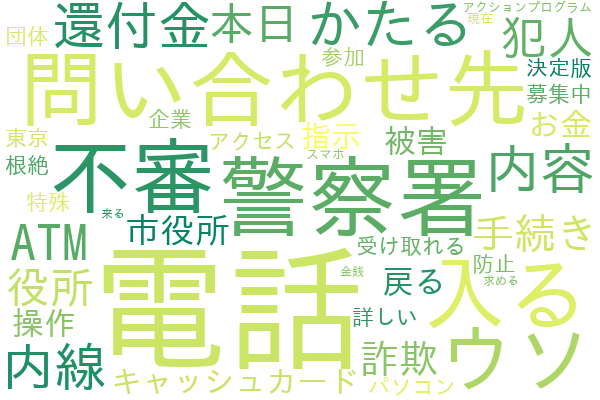

In [16]:
#完成した画像を表示する
from IPython.display import Image,display_png
display_png(Image('wordcloud.png'))